### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [470]:
import warnings
warnings.filterwarnings('ignore')

In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

uber_data = pd.read_csv('./data/uber-raw-data-apr14.csv')
df.head(10)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [472]:
print(type(uber_data.loc[0]['Date/Time']))

<class 'str'>


In [473]:
# Convert the 'Date/Time' column to datetime format
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])
uber_data['Date'] = uber_data['Date/Time'].dt.date
uber_data['Time'] = uber_data['Date/Time'].dt.time

# Group by date and count the number of pickups
cnt_per_date = uber_data.groupby('Date')['Base'].count()

# Find the date with the highest number of pickups
date_with_most_pickups = cnt_per_date.idxmax()
print("The date with most Pickups:", date_with_most_pickups)

#display(cnt_per_date.sort_values(by='Base', ascending=False).head(1))
#cnt_per_date = uber_data.groupby('Date')['Base'].count() 
#date_of_most_pickups = cnt_per_date.idxmax()
#print(date_of_most_pickups)

The date with most Pickups: 2014-04-30


In [474]:
#uber_data['Time'].head(10)
#uber_data['Date'].head(10)
#uber_data[['Date', 'Time']].head(10)

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [475]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
#cnt_per_date = uber_data.groupby('Date').agg({'Base': 'count'})
#cnt_per_date.sort_values(by='Base', ascending=False).head(1)
no_of_pickups = cnt_per_date.reset_index().set_index('Date')

# Get the count of pickups on the highest date
most_pickups = no_of_pickups.sort_values('Base', ascending=False).head(1)
print("Most no od pickups on Date:",most_pickups)


Most no od pickups on Date:              Base
Date             
2014-04-30  36251


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [476]:
# Count the number of unique TLC base companies
unique_cnt = uber_data['Base'].nunique()
print("No of Unique Values:",unique_cnt)


No of Unique Values: 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [477]:
# Group by TLC base company and count the number of pickups
pickup_cnts = uber_data.groupby('Base')['Lon'].count()

# Find the TLC base company with the highest number of pickups
highest_pickup_company = pickup_cnts.idxmax()
print("highest pickup company:",highest_pickup_company)

highest pickup company: B02682


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [478]:
# Group by TLC base company and count the number of pickups
no_of_pickups = uber_data.groupby('Base')['Lat'].count()
print(no_of_pickups)


Base
B02512     35536
B02598    183263
B02617    108001
B02682    227808
B02764      9908
Name: Lat, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [479]:
#uber_data['hour'] = uber_data['Date/Time'].dt.hour
uber_data['Date'] = uber_data['Date/Time'].dt.hour


In [480]:
# Extract the hour from the 'Date/Time' column
uber_data['hour'] = uber_data['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts1 = uber_data.groupby('hour').size()


# Find the hour with the highest number of pickups
hour_with_highest_pickups = pickup_counts1.idxmax()

am_pm = 'AM' if hour_with_highest_pickups < 12 else 'PM'
if hour_with_highest_pickups > 12:
    hour_with_highest_pickups -= 12


print("Hour with the highest number of pickups:", hour_with_highest_pickups, am_pm)

#most_pickup_hr = no_pickups_hr.idxmax()


Hour with the highest number of pickups: 5 PM


In [495]:
uber_data['Date'] = uber_data['Date/Time'].dt.date


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

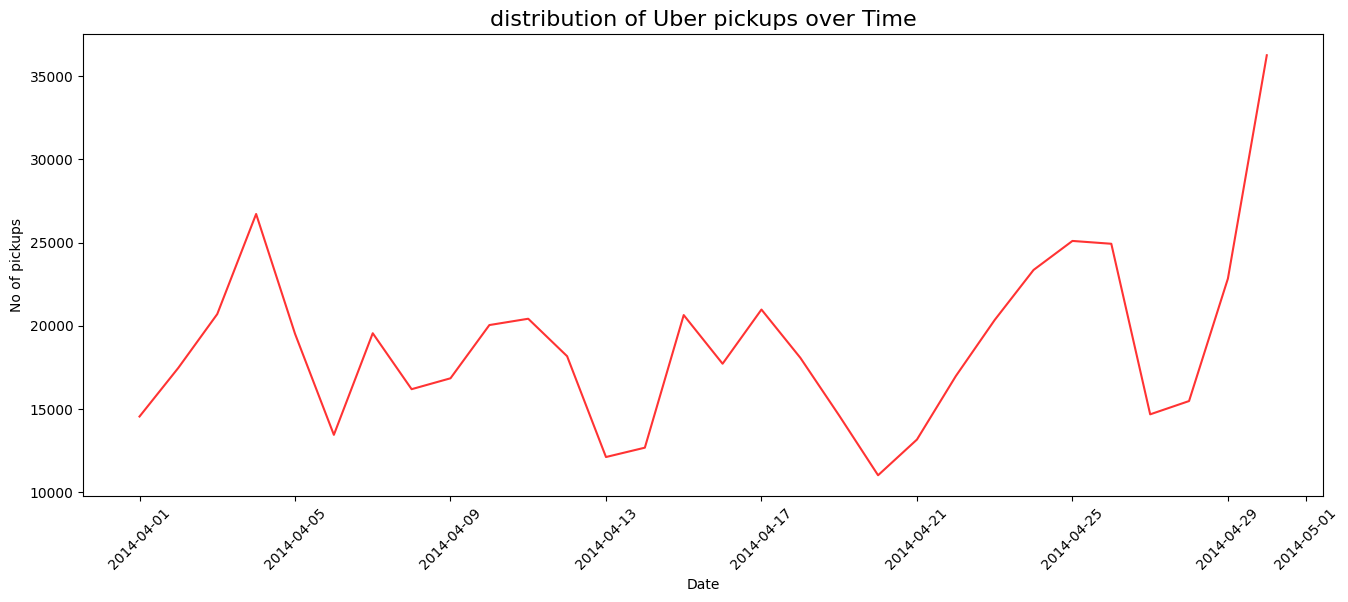

In [553]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
uber_data['Date'] = uber_data['Date/Time'].dt.date
pickups_over_time = uber_data.groupby('Date')['Base'].count()

# Create a line plot to visualize the number of pickups over time
#print(pickups_over_time)
fig = plt.figure(figsize=(16, 6))
plt.plot(pickups_over_time.index, pickups_over_time.values, c='r', alpha=.8)
plt.title("distribution of Uber pickups over Time", fontsize=16)
plt.xlabel('Date')
plt.ylabel('No of pickups')
plt.xticks(rotation=45)
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

In [458]:
colors = np.random.rand(100)


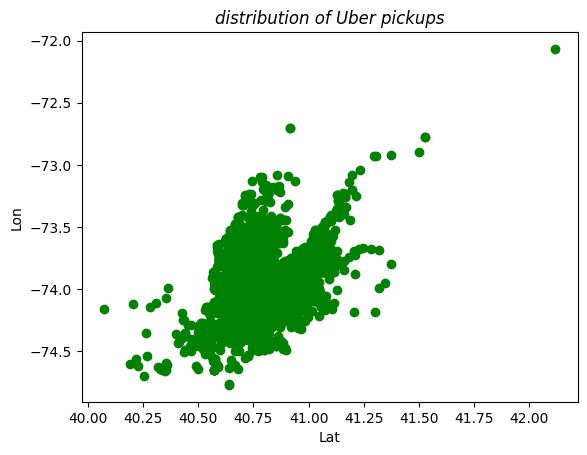

In [564]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
lat = uber_data['Lat']
lon = uber_data['Lon']
colors= 
plt.scatter(lat, lon, color=colors)
plt.title("distribution of Uber pickups", fontstyle='italic')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

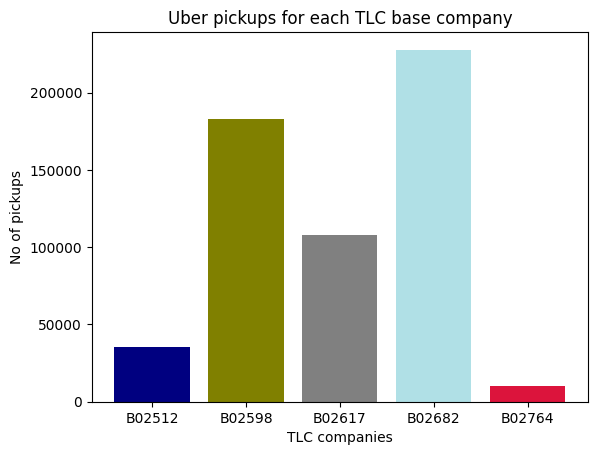

In [563]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
bar_chart = uber_data.groupby('Base')['Lon'].count()
#print(bar_chart)
colors = ['navy', 'olive', 'grey', 'powderblue', 'crimson']
plt.bar(bar_chart.index, bar_chart.values, color=colors)
plt.title("Uber pickups for each TLC base company")
plt.xlabel('TLC companies')
plt.ylabel('No of pickups')
plt.show()

In [518]:
# display(uber_data['Date'])
uber_data['week'] = uber_data['Date/Time'].dt.dayofweek
pickup_counts = uber_data.groupby('week').size()



#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

In [10]:
# Group by day of the week and count the number of pickups


# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week


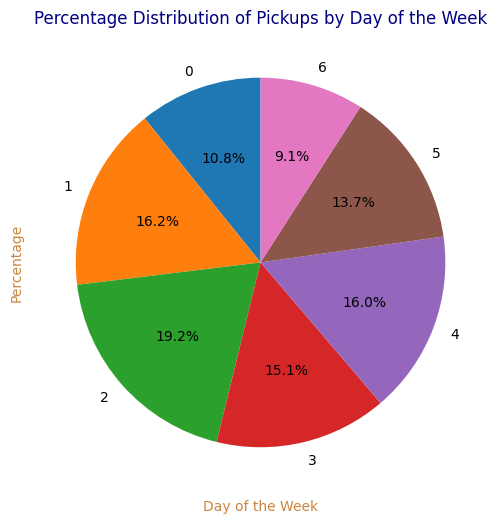

In [556]:
# display(uber_data['Date'])
uber_data['week'] = uber_data['Date/Time'].dt.dayofweek
pickup_counts = uber_data.groupby('week').size()

# Group by the day of the week and count the number of pickups
pickup_counts = uber_data.groupby('week').size()

# Calculate the percentage distribution
percentage_distribution = pickup_counts / pickup_counts.sum() * 100

# Create the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size (optional)
plt.pie(percentage_distribution, labels=pickup_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title and axis labels
plt.title('Percentage Distribution of Pickups by Day of the Week', c='navy')
plt.xlabel('Day of the Week', c='peru')
plt.ylabel('Percentage',c='peru')

# Display the pie chart
plt.show()
